<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Spring25/embeddings_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim
#You may have to restart session afterwards


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 977.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


[==================================================] 100.0% 958.5/958.4MB downloaded


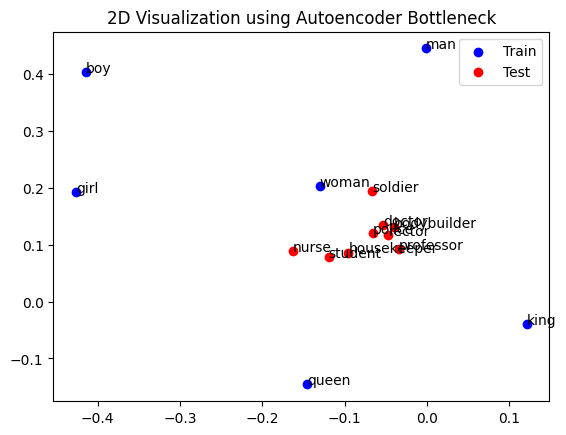

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

import gensim.downloader as api
# Load pre-trained FastText model
wv = api.load('fasttext-wiki-news-subwords-300')

# Word lists
train_words = ['king', 'man', 'woman', 'girl', 'boy', 'queen']
test_words = ['student', 'professor', 'rector', 'nurse', 'police', 'soldier', 'housekeeper', 'bodybuilder', 'doctor']
all_words = train_words + test_words

# Embedding matrix
embedding_matrix = np.array([wv[word] for word in all_words], dtype=np.float32)
train_embeddings = torch.tensor(embedding_matrix[:len(train_words)])
test_embeddings = torch.tensor(embedding_matrix[len(train_words):])

# Autoencoder definition
class Autoencoder(nn.Module):
    def __init__(self, input_dim=300, bottleneck_dim=2):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            nn.ReLU(),
            nn.Linear(100, bottleneck_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_dim, 100),
            nn.ReLU(),
            nn.Linear(100, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

# Initialize and train
model = Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# Train only on the train_embeddings
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    output = model(train_embeddings)
    loss = criterion(output, train_embeddings)
    loss.backward()
    optimizer.step()

# Get 2D bottleneck outputs
model.eval()
with torch.no_grad():
    train_2d = model.encoder(train_embeddings).numpy()
    test_2d = model.encoder(test_embeddings).numpy()

# Visualization
plt.scatter(train_2d[:, 0], train_2d[:, 1], color='blue', label='Train')
for i, word in enumerate(train_words):
    plt.annotate(word, (train_2d[i, 0], train_2d[i, 1]))

plt.scatter(test_2d[:, 0], test_2d[:, 1], color='red', label='Test')
for i, word in enumerate(test_words):
    plt.annotate(word, (test_2d[i, 0], test_2d[i, 1]))

plt.legend()
plt.title("2D Visualization using Autoencoder Bottleneck")
plt.show()


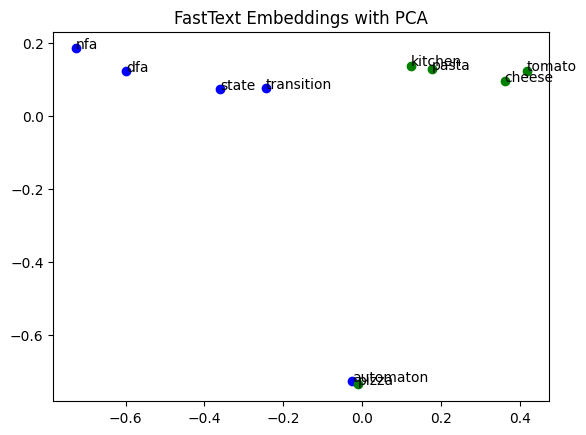

In [5]:
# FastText Embedding Visualization with PCA

from sklearn.decomposition import PCA

# --- PCA and Plotting ---
def plot_embeddings_pca(vecs, title):
    reduced = PCA(n_components=2).fit_transform(vecs)

    plt.figure()
    plt.title(title)
    for i, word in enumerate(all_words):
        color = 'blue' if word in automata_words else 'green'
        plt.scatter(reduced[i, 0], reduced[i, 1], c=color)
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
    plt.show()

plot_embeddings_pca(embedding_matrix, "FastText Embeddings with PCA")
